# Regresja liniowa

Naszym Celem jest empiryczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [89]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

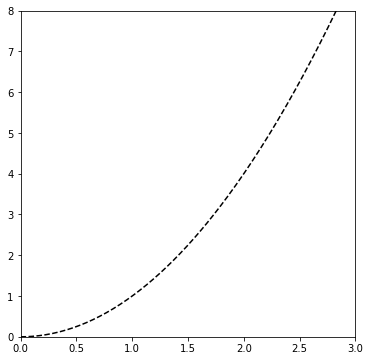

In [90]:
f = lambda x: (x**2)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

[-1.41532131  0.02331921  1.81576989  1.17071095  0.48410303  1.22548548
  2.05855895  2.60580322]


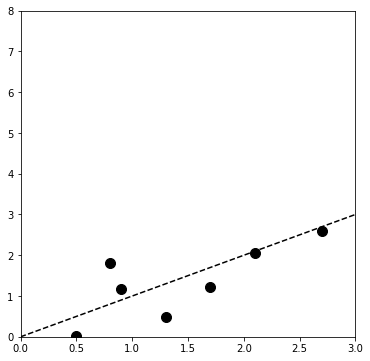

In [113]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
print(y)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [92]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.75756876]
-1.2241024268645115


Definiujemy naszą funkcję regresji

In [93]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

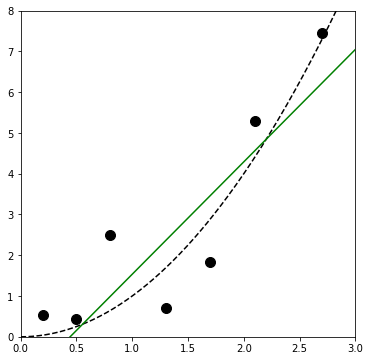

In [94]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [95]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

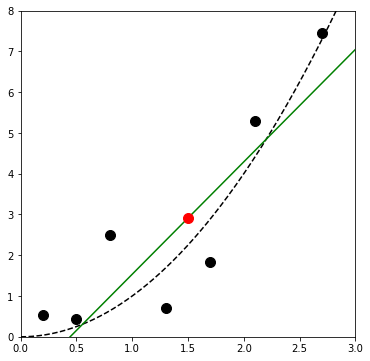

In [96]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [97]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.7300729888872878
0.6302739380563704


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [98]:
deg=1
A=np.vander(x, deg + 1)

In [123]:
params = np.linalg.solve(np.transpose(A)@A, np.transpose(A)*y)

b, a = params

print(a)
print(b)

[ 0.06038973  3.40546371  0.23317453  0.20602833  0.15350646  0.02523473
 -0.18858174 -0.65881566]
[-0.0325001  -1.63420085 -0.08986442 -0.06991912  0.00644985  0.12617367
  0.36607045  0.78891792]


# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [100]:
from scipy import optimize

def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2

x0 = np.asarray((0, 1))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 12
         Gradient evaluations: 4
[-9.99999996e-01  3.60605884e-09]


# Zadanie 3
Zdefiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [101]:
def compute_error(args):
    a, b = args
    return np.sum((y-(a*x+b))**2)

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [102]:
optimize.fmin_cg(compute_error, np.array((0, 0)))

Optimization terminated successfully.
         Current function value: 14.099500
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


array([ 2.75756878, -1.22410241])

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [103]:
def compute_error_1(args):
    a, b = args
    return np.sum(np.abs(y-(a*x+b)))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [104]:
optimize.fmin_cg(compute_error_1, np.array((0, 0)))

Optimization terminated successfully.
         Current function value: 8.998377
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 37


array([ 3.02299682, -1.05031425])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


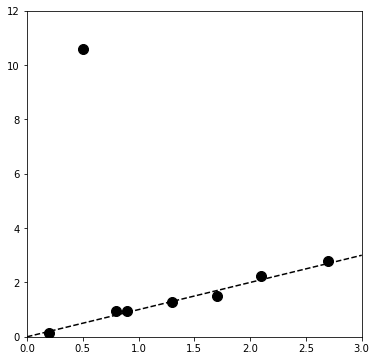

In [121]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [106]:
points = np.column_stack((x,y))

Optimization terminated successfully.
         Current function value: 76.727030
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6
         Current function value: 10.647723
         Iterations: 3
         Function evaluations: 165
         Gradient evaluations: 53


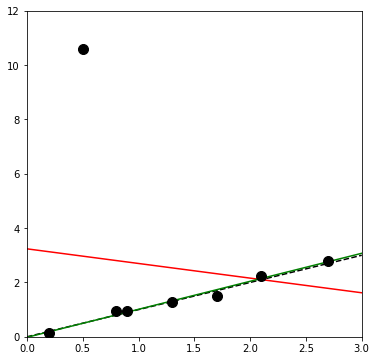

[-0.53887256  3.23640014]
[ 1.03060252 -0.01896259]


In [122]:
coeffs1 = optimize.fmin_cg(compute_error, np.array((0, 0)))
coeffs2 = optimize.fmin_cg(compute_error_1, np.array((0, 0)))

f1 = lambda x: coeffs1[0] * x + coeffs1[1]
f2 = lambda x: coeffs2[0] * x + coeffs2[1]

x_f1 = np.linspace(0., 3, 200)
y_f1 = f1(x_f1)

x_f2 = np.linspace(0., 3, 200)
y_f2 = f2(x_f2)

plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f1, y_f1, 'r');
plt.plot(x_f2, y_f2, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

print(coeffs1)
print(coeffs2)